In [10]:
import numpy as np
import matplotlib.pyplot as plt
from idx_tools import Idx
from plot_data import Results
import tensorflow as tf
from tensorflow import keras
import os

from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

%matplotlib inline

In [11]:
# Read the data 
filename = './dataset/train-images.idx3-ubyte'
train_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/train-labels.idx3-ubyte'
train_labels = Idx.load_labels(filename)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


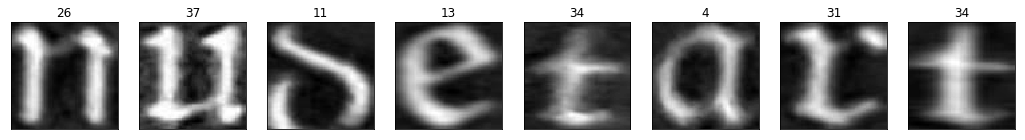

In [3]:
# Plot some random examples
n_images = train_images.shape[0]
n_plots = 8

fig, ax = plt.subplots(1, n_plots, figsize=(18, 18))
for i in range(n_plots):
    image_num = np.random.randint(low=0, high=n_images)
    ax[i].imshow(train_images[image_num], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(train_labels[image_num])

Modified from: https://www.tensorflow.org/tutorials/keras/basic_classification

In [4]:
class_names = ['2', '5', '6', '8', 'a', 'A', 'b', 'B', 'c', 'ch', 'ck', 'd', 'D', 
               'e', 'E', 'f', 'F', 'g', 'G', 'h', 'i', 'k', 'K', 'l', 'm', 'M', 'n', 'N', 'o', 
               'p', 'P', 'r', 's', 'S', 't', 'T', 'tz', 'u', 'v', 'w', 'W', 'z', 'Z', 'ß']

train_images = train_images / 255.0
test_images = test_images / 255.0

n_categories = len(class_names)

In [5]:
batch_size = 128
epochs = 3

img_rows = 80
img_cols = 80

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)


input_shape = (img_rows, img_cols, 1)


model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_categories, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history =  model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, test_labels))
score = model.evaluate(test_images, test_labels, verbose=0)

W0826 02:05:13.092664 21668 deprecation.py:506] From C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 11912 samples, validate on 5107 samples
Epoch 1/3
11912/11912 [==============================] - 86s 7ms/sample - loss: 3.7511 - acc: 0.0674 - val_loss: 3.7047 - val_acc: 0.1208
Epoch 2/3
11912/11912 [==============================] - 81s 7ms/sample - loss: 3.6660 - acc: 0.1242 - val_loss: 3.6020 - val_acc: 0.1053
Epoch 3/3
11912/11912 [==============================] - 81s 7ms/sample - loss: 3.5567 - acc: 0.1266 - val_loss: 3.4683 - val_acc: 0.1053


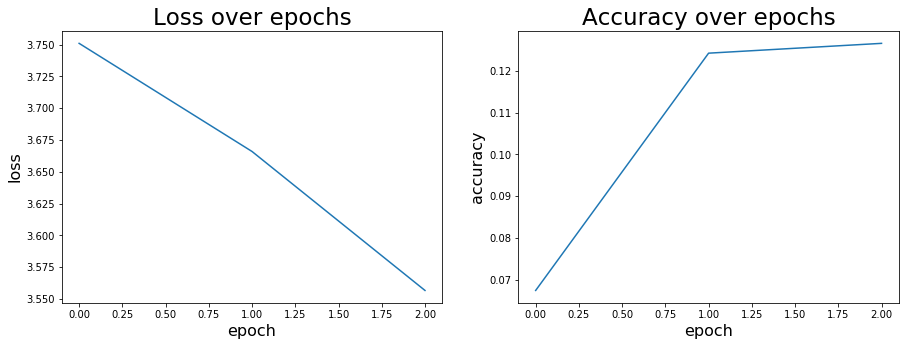

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss over epochs', fontsize=23)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_ylabel('loss', fontsize=16)

ax[1].plot(history.history['acc'])
ax[1].set_title('Accuracy over epochs', fontsize=23)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_ylabel('accuracy', fontsize=16)

plt.show()

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


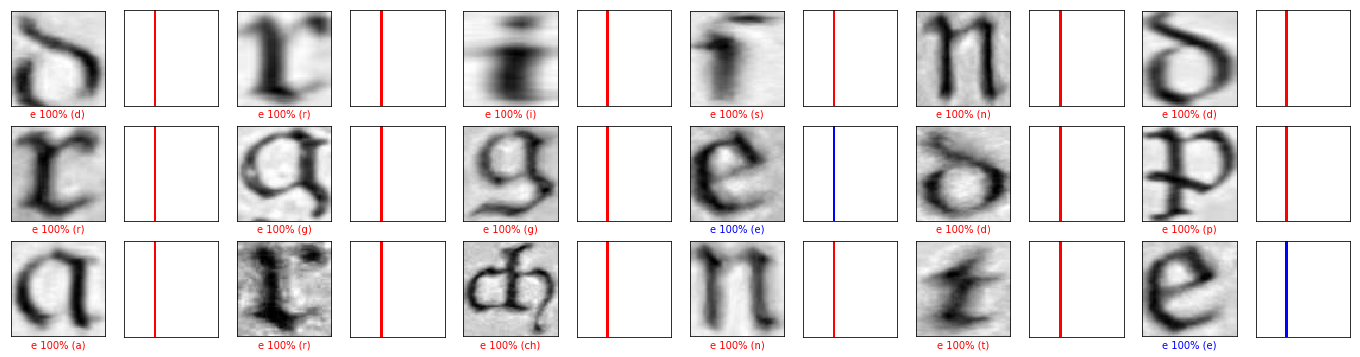

In [9]:
'''
# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

test_data = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

predictions = model.predict(test_data)
'''

predictions = model.predict(test_images)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    Results.plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    Results.plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

In [8]:
# Save the model
if not os.path.isdir('./model'):
    os.mkdir('./model')

# Save the model structure to JSON file
model_json = model.to_json()
with open("./model/model_conv.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5 file
model.save_weights("./model/model_conv.h5")
print("Model saved")

Model saved
